In [1]:
# special kinds of K-lines
# doji: when the open and close prices are quite similar
# hammer: upper or lower shadow is very short

In [2]:
import pandas as pd
ssec2015=pd.read_csv('SSEC2015.csv')
ssec2015=ssec2015.iloc[:,1:]
ssec2015.head(3)

,Date,Open,High,Low,Close,Volume
0,2015-03-02,3332.720947,3336.760010,3298.668945,3336.284912,346400
1,2015-03-03,3317.695068,3317.695068,3260.428955,3263.052002,382000
2,2015-03-04,3264.181885,3286.587891,3250.483887,3279.532959,293600


In [3]:
ssec2015.iloc[-3:,:]

,Date,Open,High,Low,Close,Volume
19,2015-03-27,3686.134033,3710.477051,3656.831055,3691.095947,408900
20,2015-03-30,3710.612061,3795.935059,3710.612061,3786.568115,564700
21,2015-03-31,3822.987061,3835.566895,3737.042969,3747.898926,561700


In [4]:
# date type must be float
from matplotlib.dates import DateFormatter,WeekdayLocator,DayLocator,MONDAY,date2num
from datetime import datetime
ssec2015.Date=[date2num(datetime.strptime(date,"%Y-%m-%d")) for date in ssec2015.Date]

In [5]:
type(ssec2015)

pandas.core.frame.DataFrame

In [6]:
# candlestick_ohlc needs list type, transfer below
ssec15list=list()
for i in range(len(ssec2015)):
    ssec15list.append(ssec2015.iloc[i,:])

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


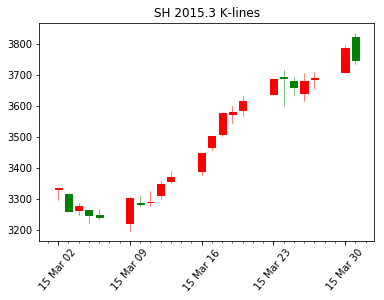

In [9]:
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
ax=plt.subplot()
mondays=WeekdayLocator(MONDAY)
weekFormatter=DateFormatter('%y %b %d')
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(DayLocator())
ax.xaxis.set_major_formatter(weekFormatter)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
ax.set_title("SH 2015.3 K-lines")
candlestick_ohlc(ax, ssec15list, width=0.7,colorup='r', colordown='g')
plt.setp(plt.gca().get_xticklabels(),rotation=50, horizontalalignment='center')
plt.show()

In [10]:
help(candlestick_ohlc)

Help on function candlestick_ohlc in module mpl_finance:

candlestick_ohlc(ax, quotes, width=0.2, colorup='k', colordown='r', alpha=1.0)
    Plot the time, open, high, low, close as a vertical line ranging
    from low to high.  Use a rectangular bar to represent the
    open-close span.  If close >= open, use colorup to color the bar,
    otherwise use colordown
    
    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    quotes : sequence of (time, open, high, low, close, ...) sequences
        As long as the first 5 elements are these values,
        the record can be as long as you want (e.g., it may store volume).
    
        time must be in float days format - see date2num
    
    width : float
        fraction of a day for the rectangle width
    colorup : color
        the color of the rectangle where close >= open
    colordown : color
         the color of the rectangle where close <  open
    alpha : float
        the rectangle alpha level
   

In [11]:
# patterns
# continuation and reversal patterns

In [12]:
# morning star
# negative -> doji -> positive
# dusk star
# positive -> doji -> negative
ssec2012=pd.read_csv('SSEC2012.csv')
ssec2012.index=ssec2012.iloc[:,1]
ssec2012.index=pd.to_datetime(ssec2012.index, format='%Y-%m-%d')
ssec2012=ssec2012.iloc[:,2:]
ssec2012.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-04,2211.995117,2217.520020,2168.644043,2169.389893,49200
2012-01-05,2160.896973,2183.404053,2145.555908,2148.451904,58800


In [14]:
ssec2012.iloc[-2:,:]

,Open,High,Low,Close,Volume
Date,,,,,
2012-12-28,2207.913086,2234.868896,2204.002930,2233.251953,116000
2012-12-31,2236.460938,2269.511963,2236.460938,2269.127930,128000


In [15]:
Close=ssec2012.Close
Open=ssec2012.Open

In [16]:
# compute the difference of daily open and close
ClOp=Close-Open
ClOp.head()

Date
2012-01-04   -42.605224
2012-01-05   -12.445069
2012-01-06    15.248047
2012-01-09    61.148926
2012-01-10    63.911865
dtype: float64

In [17]:
ClOp.describe()

count    243.000000
mean       2.244368
std       22.884043
min      -73.685059
25%      -11.442016
50%        1.513183
75%       14.296997
max       91.843994
dtype: float64

In [18]:
Shape = [0,0,0]
lag1ClOp=ClOp.shift(1)
lag2ClOp=ClOp.shift(2)
# make decisions
for i in range(3,len(ClOp),1):
    if all([lag2ClOp[i]<-11,abs(lag1ClOp[i])<2,ClOp[i]>6,abs(ClOp[i])>abs(lag2ClOp[i]*0.5)]):
        Shape.append(1)
    else:
        Shape.append(0)
# return the index of the 1st '1' (the star we arr looking for)
Shape.index(1)

165

In [19]:
# catch the direction and plot
lagOpen=Open.shift(1)
lagClose=Close.shift(1)
lag2Close=Close.shift(2)

In [20]:
# find doji
Doji=[0,0,0]
for i in range(3,len(Open),1):
    if all([lagOpen[i]<Open[i],lagOpen[i]<lag2Close[i],lagClose[i]<Open[i],(lagClose[i]<lag2Close[i])]):
        Doji.append(1)
    else:
        Doji.append(0)
Doji.count(1)

12

In [21]:
# illustrate the flop tendency
ret=Close/Close.shift(1)-1
lag1ret=ret.shift(1)
lag2ret=ret.shift(2)
Trend=[0,0,0]
# find the flop trend 
for i in range(3,len(ret)):
    if all([lag1ret[i]<0,lag2ret[i]<0]):
        Trend.append(1)
    else:
        Trend.append(0)

In [22]:
StarSig=[]
# use the three signals above to find the star
for i in range(len(Trend)):
    if all([Shape[i]==1,Doji[i]==1,Trend[i]==1]):
        StarSig.append(1)
    else:
        StarSig.append(0)
# consider 2012's trend
for i in range(len(StarSig)):
    if StarSig[i]==1:
        print(ssec2012.index[i])

2012-09-06 00:00:00


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


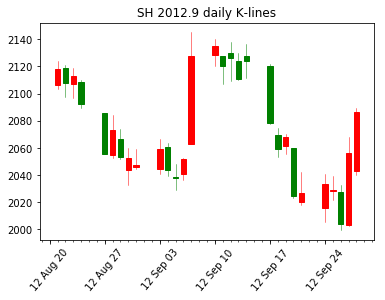

In [24]:
# extract trading data and plot
ssec201209=ssec2012['2012-08-21':'2012-09-30']
# need to specify path before import
# import candle.py
import candle
candle.candlePlot(ssec201209, title='SH 2012.9 daily K-lines')

In [25]:
# Dark Cloud Cover & embrace line
# higher negative following lower positive 
# bigger negative following smaller positive 

In [26]:
ssec2011=pd.read_csv('SSEC2011.csv')
ssec2011.index=ssec2011.iloc[:,1]
ssec2011.index=pd.to_datetime(ssec2011.index, format='%Y-%m-%d')
ssec2011=ssec2011.iloc[:,2:]

In [27]:
Close11=ssec2011.Close
Open11=ssec2011.Open

In [28]:
# find two candles
lagClose11=Close11.shift(1)
lagOpen11=Open11.shift(1)
Cloud=pd.Series(0,index=Close11.index)
for i in range(1,len(Close11)):
    if all([Close11[i]<Open11[i],lagClose11[i]>lagOpen11[i],Open11[i]>lagClose11[i],\
            Close11[i]<0.5*(lagClose11[i]+lagOpen11[i]),Close11[i]>lagOpen11[i]]):
        Cloud[i]=1

In [29]:
# define ascending trend
Trend=pd.Series(0,index=Close11.index)
for i in range(2,len(Close11)):
    if Close11[i-1]>Close11[i-2]>Close11[i-3]:
        Trend[i]=1
# find dark clouds
darkCloud=Cloud+Trend
darkCloud[darkCloud==2]

Date
2011-05-19    2
2011-08-16    2
dtype: int64

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


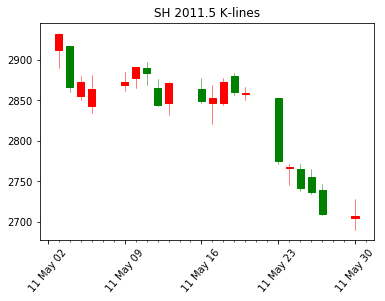

In [32]:
ssec201105=ssec2011['2011-05-01':'2011-05-30']           
candle.candlePlot(ssec201105, title='SH 2011.5 K-lines')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


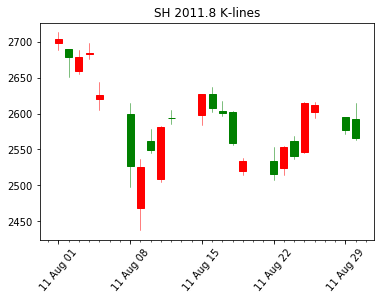

In [33]:
ssec201108=ssec2011['2011-08-01':'2011-08-30']
candle.candlePlot(ssec201108, title='SH 2011.8 K-lines')